In [14]:
import hashlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit



class StudentDataset:
    def __init__(self,num_students:10000,username:"shriansh.sahu"):
        
        # Generate seed for random numbers generater
        seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
        self.rng = np.random.default_rng(seed)
        self.num_students = num_students
        self.username = username

        # Generate dataset once at initialization
        self.full_df = self.assemble_dataframe()
    

    def gender_generater(self) -> list[str]:

        # Generates random genders 

        return self.rng.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )

    def generate_major(self) -> list[str]:

        # Generates Major for students

        return self.rng.choice(
            ["B.tech","MS","Phd"],
            size=self.num_students,
            p=[0.70,0.20,0.10]
        )

    def generate_program_with_major(self,majors : list [ str ]) -> list[str]:

        # Generate Program with major
        prog = []
        for major in majors:

            if major == "B.tech" :
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.40,0.40,0.10,0.10]))

            elif major == "MS" :
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.30,0.30,0.20,0.20]))

            else:
                prog.append(self.rng.choice(["CSE","ECE","CHD","CND"],p=[0.25,0.25,0.25,0.25]))
                
        return prog        

    def generate_gpa(self,majors : list [ str ]) -> list[str]:

        # Generate GPA with Major as parameter 

        gpa = []

        for major in majors:

            if major == "B.tech" :
                gpa.append(np.clip(self.rng.normal(7.0,1.0),4.0,10.0))

            elif major == "MS" :
                gpa.append(np.clip(self.rng.normal(8.0,0.7),4.0,10.0)) 

            else:
                gpa.append(np.clip(self.rng.normal(8.3,0.5),4.0,10.0))

        return gpa        

    def assemble_dataframe(self) -> pd.DataFrame:

        # Assemble all data into dataframe 

        majors = self.generate_major()
        df = pd.DataFrame({
            "Gender" : self.gender_generater(),
            "Major"  : majors,
            "Program": self.generate_program_with_major(majors),
            "GPA"    : self.generate_gpa(majors)
        })
        
        return df

    def get_full_dataframe(self) -> pd.DataFrame:

        return self.full_df    
    
    # Adding Username in the file name
    
    def _add_username(self):
        plt.text(
            0.95 , 0.95 , self.username,
            ha = 'right', va = 'top' ,
            transform = plt.gca().transAxes ,
            fontsize =10 , color = 'gray' , alpha =0.7
        )

        # Visualization For Following Distribution

    def plot_gender_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Gender")
        plt.title("Gender Distibution")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        self._add_username()
        plt.show   


    def plot_major_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Major")
        plt.title("Major Distibution")
        plt.xlabel("Major")
        plt.ylabel("Count")
        self._add_username()
        plt.show      


    def plot_program_distribution(self) -> None:
        sb.countplot(data=self.full_df , x = "Program")
        plt.title("Program Distibution")
        plt.xlabel("Program")
        plt.ylabel("Count")
        self._add_username()
        plt.show     


    def plot_gpa_distribution(self , bins : int = 20) -> None:
        plt.hist(self.full_df["GPA"], bins=bins, edgecolor = "Yellow")
        plt.title("GPA Distibution")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        self._add_username()
        plt.show     


    def plot_program_by_major(self) -> None:
        sb.countplot(data=self.full_df , x = "Major", hue = "Program")
        plt.title("Program Distibution by Major")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.legend(title = "Program")
        self._add_username()
        plt.show  


    def plot_gpa_by_major(self) -> None:
        sb.boxplot(data=self.full_df , x = "Major", y = "GPA")
        plt.title("GPA Distibution by Major")
        plt.xlabel("Major")
        plt.ylabel("GPA")
        self._add_username()
        plt.show  


    def plot_gpa_by_program(self) -> None:
        sb.boxplot(data=self.full_df , x = "Program", y = "GPA")
        plt.title("GPA Distibution by Program")
        plt.xlabel("Program")
        plt.ylabel("GPA")
        self._add_username()
        plt.show     


    def plot_gpa_by_program_and_major(self) -> None:
        sb.boxplot(data = self.full_df , x = "Program", y = "GPA" , hue = "Major")
        plt.title("GPA Distibution by Program and Major")
        plt.xlabel("Program")
        plt.ylabel("GPA")
        plt.legend(title = "Major")
        self._add_username()
        plt.show  


    def plot_sampled_dataset(self) -> None:
        sampled = self.full_df.sample(100, random_state = self.rng)
        sb.pairplot(sampled , hue = "Gender")
        plt.suptitle("Sample Dataset of (1000 Students" ,y = 1.02)
        self._add_username()
        plt.show     


    def plot_entire_dataset_summary(self) -> None:
        sb.pairplot(self.full_df , hue = "Gender")
        plt.suptitle("Entire Dataset Summary" ,y = 1.02)
        self._add_username()
        plt.show    

    # b) Mean and SD of GPA

    def gpa_mean_std ( self ) -> tuple [ float , float ]:

        gpas = self.full_df["GPA"].to_numpy()
        mean = gpas.mean()
        sd = gpas.std()

        return [mean, sd]
    
    # c) Count No of stidnets for pair(program,major)

    def count_students_per_program_major_pair ( self ) -> pd.DataFrame:

        group_students = self.full_df.groupby(["Program","Major"]).size().reset_index(name = "Student_Count")

        return group_students
    
    # HeatMap For Student_Count

    def visualize_students_per_program_major_pair ( self , counts_df:pd.DataFrame) -> None :

        pivot_fulldf = counts_df.pivot( index="Major",columns="Program",values="Student_Count").fillna(0)
        sb.heatmap(pivot_fulldf,annot=True, fmt= ".0f" , cmap= "coolwarm" , cbar=True)
        plt.title(" NUmber of Students per Program and Major")
        plt.xlabel("Program")
        plt.ylabel("Major")
        self._add_username()
        plt.show()      


    # 1.2 Simple and Stratified sampling 


      #    By Simple Sampling

    def get_gpa_mean_std_random ( self , Samplesize : int = 500 , repeats : int = 50)-> tuple [ float , float ]:

       gpa_means = []
       gpa_stds  = []
       for i in range(repeats):
            sampled = self.full_df.sample(500)
            means = sampled["GPA"].mean()
            stds = sampled["GPA"].std()

            gpa_means.append(means) 
            gpa_stds.append(stds)

       gpa_mean_avg = sum(gpa_means)/len(gpa_means)
       std_mean_gpa = (pd.Series(gpa_means).std())


       return (gpa_mean_avg , std_mean_gpa)
    

    # By Stratified Sampling
    
    def get_gpa_mean_std_stratified ( self , n : int = 500 , repeats : int = 50) -> tuple [ float , float ]:

        gpa_means = []
        Stratified_Split  = StratifiedShuffleSplit(n_splits=repeats,train_size=n)
        x = self.full_df.drop(columns=["GPA"])
        y = self.full_df["Major"]

        for train_indx ,_ in Stratified_Split.split(x,y):
            means = np.mean(self.full_df.loc[train_indx,"GPA"].to_numpy())
            gpa_means.append(means)

        
        gpa_mean_avg = sum(gpa_means)/len(gpa_means)
        std_mean_gpa = (pd.Series(gpa_means).std())

        return(gpa_mean_avg,std_mean_gpa)



    # 1.3 Gender-Balanced Cohart 

    # Report Gender Count

    def get_gender_balanced_counts ( self , n : int = 300 , repeats : int = 5)-> list [ dict [ str , int ]]:
        
        result = []

        for i in range(repeats):

            male_sample = self.full_df[self.full_df['Gender']=='Male'].sample(int(n/3), replace=True)
            female_sample = self.full_df[self.full_df['Gender']=='Female'].sample(int(n/3), replace=True)
            other_sample = self.full_df[self.full_df['Gender']=='Other'].sample(int(n/3), replace=True)

            balanced_sample = pd.concat([male_sample,female_sample,other_sample])

            gender_counts = balanced_sample["Gender"].value_counts().to_dict()  

            result.append(gender_counts)

        return result
    
    # Sample Strategy A
    def sample_gender_uniform_random ( self , n : int = 300 , repeats : int = 5) -> list [ dict [ str , int ]]:

        result = []
        categories = self.full_df["Gender"].unique()
         
         
        for _ in range(repeats):
            Sampled_student = []
            for _ in range(n):
                gender = self.rng.choice(categories)
                student = self.full_df[self.full_df['Gender'] == gender].sample(n = 1, replace=True)
                Sampled_student.append(student)
                
                
            balanced_sample = pd.concat(Sampled_student)

            gender_counts = balanced_sample["Gender"].value_counts().to_dict()

            result.append(gender_counts)
            
        return result
    
    # Sample Size vs Average Maximum Relative Difference

    def plot_avg_max_gender_diff_vs_sample_size ( self , sample_sizes : list[int] = [300,600, 900, 1200, 1500] , repeats : int = 10) -> None :

        categories = self.full_df["Gender"].unique()
        results = []
         
        for n in sample_sizes:
         relative_diffs = []

         for _ in range(repeats):
             
             Sampled_student = []

             for _ in range(n):
                   gender = self.rng.choice(categories)
                   student = self.full_df[self.full_df['Gender'] == gender].sample(n = 1, replace=True)
                   Sampled_student.append(student)
                   
             balanced_sample = pd.concat(Sampled_student)

             gender_counts = balanced_sample["Gender"].value_counts().to_dict()

             max_count = max(gender_counts.values())
             min_count = min(gender_counts.values())
             relative_diff = (max_count-min_count)/n
             relative_diffs.append(relative_diff)

            
         relative_diffs_avg = np.mean(relative_diffs)
         results.append({"Sample Size" : n , "Average maximum relative difference": relative_diffs_avg})

        results_df = pd.DataFrame(results)

        results_df['Sample Size'] = results_df['Sample Size'].astype(int)

        plt.bar(results_df["Sample Size"], results_df["Average maximum relative difference"],width=100, edgecolor = "Yellow")
        plt.title("Effect of sample size on gender balance")
        plt.xlabel("Sample Size")
        plt.ylabel(" Average maximum relative difference ")
        self._add_username()
        plt.show 
  


    # 1.4 GPA-Uniform Cohort

    # 100 Sampled Student Using Sampling Strategy A
       
    def sample_gpa_uniform ( self , n : int = 100 , bins : int = 10) -> pd.DataFrame:

          gpa_bins = np.linspace(4.0,10.0,bins+1)

          self.full_df['gpa_bins'] = pd.cut(self.full_df["GPA"],bins = gpa_bins , labels=False , include_lowest=True)
          categories = sorted (self.full_df['gpa_bins'].unique())
         
         
          Sampled_student = []
          for _ in range(n):
                bin_choice = self.rng.choice(categories)
                student = self.full_df[self.full_df['gpa_bins'] == bin_choice].sample(n = 1, replace=True)
                Sampled_student.append(student)
                
                
          balanced_sample = pd.concat(Sampled_student)

          balanced_sample = balanced_sample.drop( columns=['gpa_bins'])

          return balanced_sample
    

    # Hist Plot of GPA Distribution Comparision: Full Population vs Uniform Sampling

    
    def plot_gpa_histogram_comparison ( self , sampled_df : pd.DataFrame ) ->None :

        bins = np.linspace(4.0,10.0,11)

        plt.hist(self.full_df["GPA"],bins=bins,label='Full Population',alpha = 0.7,color='blue',edgecolor = "black")
        plt.hist(sampled_df["GPA"],bins=bins,label='Uniform Sampling',alpha = 0.8,color='yellow', edgecolor = "black")
        plt.title("GPA Distribution Comparision: Full Population vs Uniform Sampling")
        plt.xlabel("GPA")
        plt.ylabel(" Frequency ")
        self._add_username()
        plt.show 

    #  1.5  Program-Major Balanced Cohort

    # Smapled 60 students form Program and Major approximately equally


    def sample_program_major_balanced ( self , n : int = 60 ) -> pd . DataFrame :
         Sampled_student = []

         self.full_df['prog_maj_grp'] = self.full_df["Major"] + "_" + self.full_df["Program"]
         categories = sorted(self.full_df['prog_maj_grp'].unique())


         for _ in range(n):
                combo_choice = self.rng.choice(categories)
                student = self.full_df[self.full_df['prog_maj_grp'] == combo_choice].sample(n = 1, replace=True)
                Sampled_student.append(student)
                
         balanced_sample = pd.concat(Sampled_student)

         balanced_sample = balanced_sample.drop( columns=['prog_maj_grp'])
         return balanced_sample
    
    # Showing Heat Map and Count

    def show_program_major_counts_and_heatmap ( self , sampled_df : pd.DataFrame ) -> None :

        sample_counts = sampled_df.groupby(["Major","Program"]).size().reset_index(name='Count')

        pivot_fulldf = sample_counts.pivot( index="Major",columns="Program",values='Count').fillna(0)
        sb.heatmap(pivot_fulldf,annot=True, fmt= ".0f" , cmap= "coolwarm" , cbar=True)
        plt.title("Sampled population counts by Program and Major")
        plt.xlabel("Program")
        plt.ylabel("Major")
        self._add_username()
        plt.show()

        print(sample_counts)





# Q1.0 Dataset Generation

In [55]:
dataset = StudentDataset(10000,"shriansh.sahu")
print(dataset.get_full_dataframe())

      Gender   Major Program       GPA
0       Male  B.tech     CSE  6.944577
1       Male  B.tech     ECE  4.952452
2     Female  B.tech     CSE  5.427805
3     Female     Phd     ECE  7.607881
4       Male  B.tech     ECE  5.359469
...      ...     ...     ...       ...
9995    Male  B.tech     CND  5.000791
9996    Male      MS     ECE  8.617539
9997    Male      MS     ECE  7.132276
9998  Female  B.tech     CSE  7.180904
9999    Male  B.tech     ECE  6.220167

[10000 rows x 4 columns]


# Q1.1 Dataset Analysis

## a.Visualization Methods

### 1. Geneder Distribution

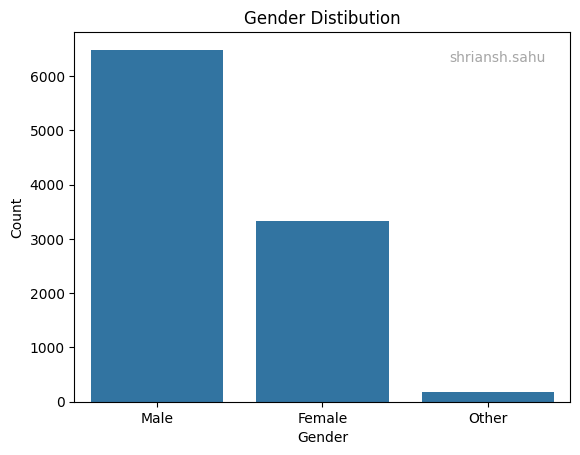

In [56]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.plot_gender_distribution()

### 2. Major Distribution

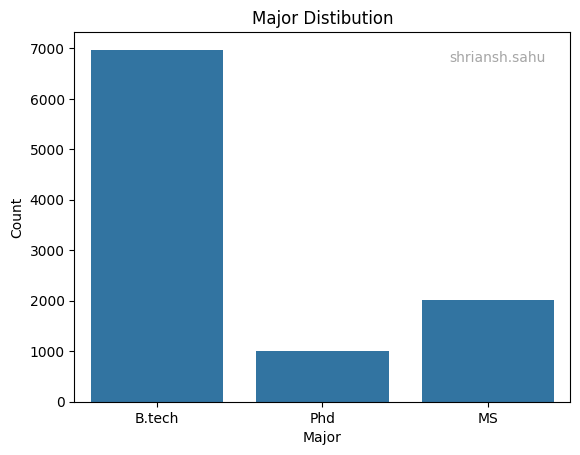

In [57]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_major_distribution()

### 3. Program Distribution

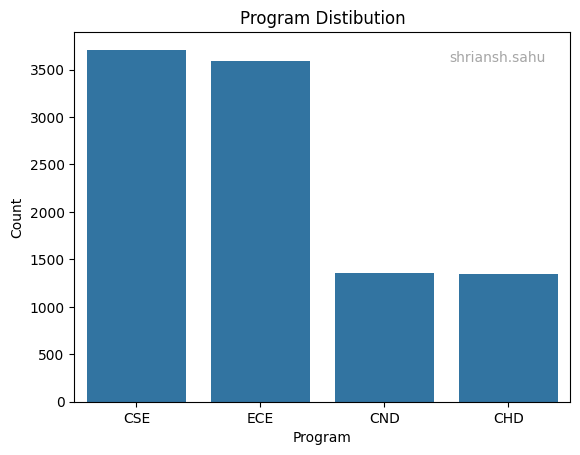

In [58]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.plot_program_distribution()

### 4. GPA Distribution 

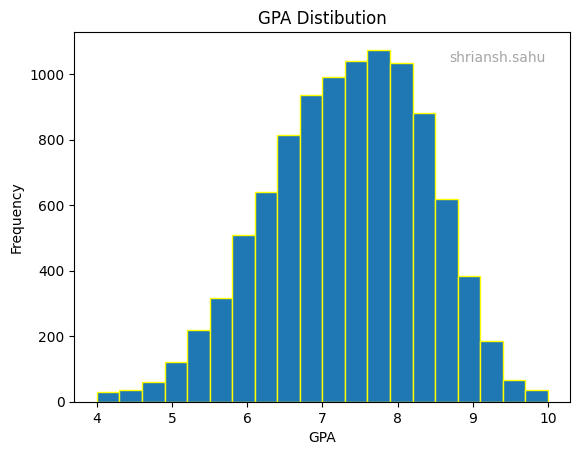

In [59]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_gpa_distribution()

### 5. Program Distribution By Major

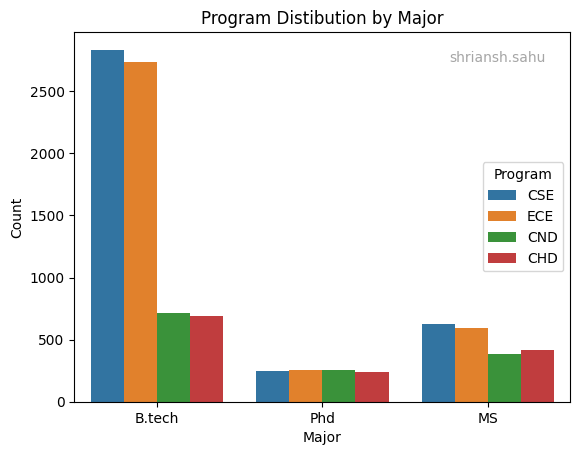

In [60]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_program_by_major()

### 6. GPA Distribution By Major

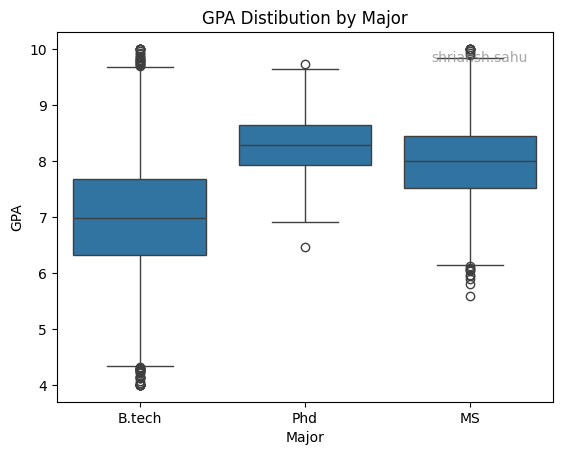

In [61]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_gpa_by_major()

### 7. GPA Distribution By Program

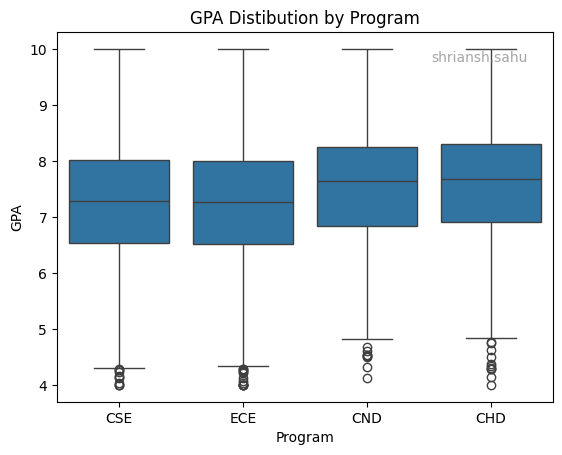

In [62]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_gpa_by_program()

### 8. GPA Distribution By Program And Major

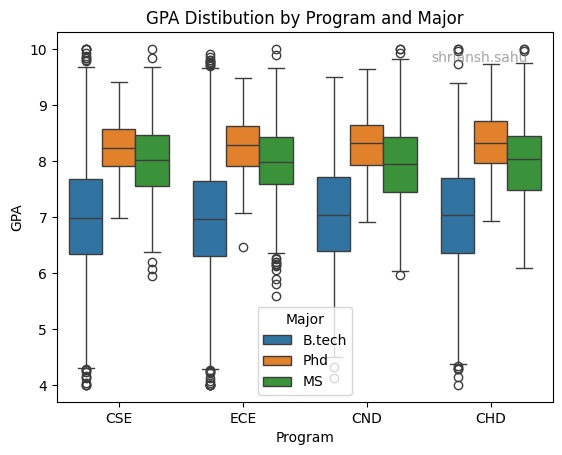

In [63]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_gpa_by_program_and_major()

### 9. Sampled Dataset

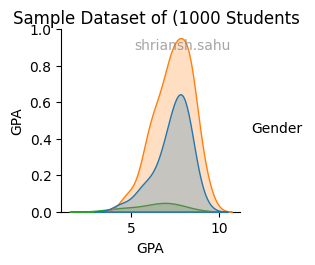

In [64]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_sampled_dataset()

### 10. Entire Dataset Summary

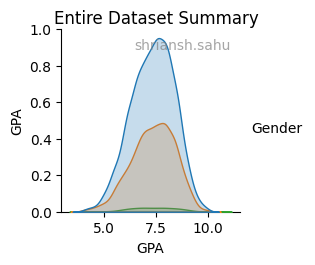

In [65]:
dataset = StudentDataset(10000,"shriansh.sahu")

dataset.plot_entire_dataset_summary()

# b. GPA Summary Statistics

In [66]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.gpa_mean_std()

[np.float64(7.32800680021756), np.float64(1.0383534855720542)]

# c. Program Major Combination

### Student Counts 

In [67]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.count_students_per_program_major_pair()

,Program,Major,Student_Count
0,CHD,B.tech,688
1,CHD,MS,416
2,CHD,Phd,242
3,CND,B.tech,715
4,CND,MS,383
5,CND,Phd,259
6,CSE,B.tech,2834
7,CSE,MS,627
8,CSE,Phd,248
9,ECE,B.tech,2735


### Student_Count HeatMap

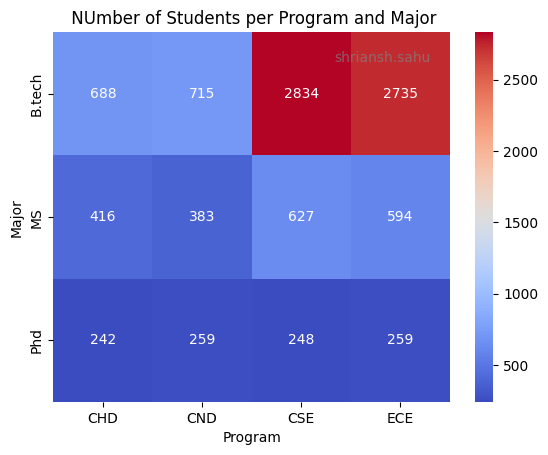

In [68]:
dataset = StudentDataset(10000,"shriansh.sahu")
counts_df = dataset.count_students_per_program_major_pair()
dataset.visualize_students_per_program_major_pair(counts_df)

# Q1.2 Simple vs Stratified Sampling

### Simple Sampling

In [69]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.get_gpa_mean_std_random()

(np.float64(7.319362729124223), np.float64(0.04722354002425713))

### Stratified Sampling

In [70]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.get_gpa_mean_std_stratified()

(np.float64(7.326810460625311), np.float64(0.030058245420443275))

### Comparision

### In Simple Sampling everyitme we iterate we just pick 500 Students at random and therefore the sample may not present the same proportion we require for sampling by grouping GPA this randomness makes the mean of gpas to fluctuate more increasing the SD

### On the other hand in Startified sampling we divide students by strata first and then sample propotionally from each group this ensure sample matches the population structure and every this provide a stable means for gpa without much varying the SD .

# Q1.3 Gender-Balanced Cohort

### Report Gender Counts


In [73]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.get_gender_balanced_counts()

[{'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100},
 {'Male': 100, 'Female': 100, 'Other': 100}]

### Smapling Strategy A

In [2]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.sample_gender_uniform_random()

[{'Other': 108, 'Male': 105, 'Female': 87},
 {'Female': 111, 'Male': 98, 'Other': 91},
 {'Male': 109, 'Female': 97, 'Other': 94},
 {'Other': 106, 'Female': 99, 'Male': 95},
 {'Male': 110, 'Female': 101, 'Other': 89}]

### Sampling Size vs Average Relative Difference

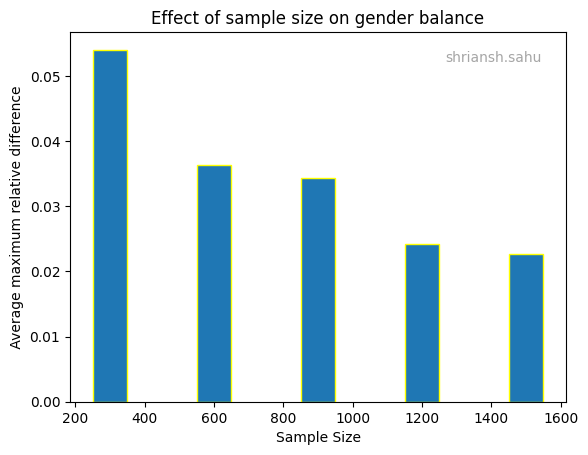

In [5]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.plot_avg_max_gender_diff_vs_sample_size()

# 1.4 GPA-Uniform Cohort

### Uniform GPA Sampling

In [9]:
dataset = StudentDataset(10000,"shriansh.sahu")
dataset.sample_gpa_uniform()

,Gender,Major,Program,GPA
8705,Female,B.tech,CSE,8.287593
2076,Male,B.tech,CND,5.736392
3321,Male,B.tech,ECE,5.059536
2963,Male,B.tech,CND,5.715128
6826,Female,B.tech,ECE,6.258819
...,...,...,...,...
3632,Male,B.tech,CSE,7.419978
4789,Male,B.tech,ECE,6.412218
620,Male,MS,CSE,8.248302
3158,Male,B.tech,CSE,4.896105


### Plot Hist Difference Between Total Population vs Uniform Sampled

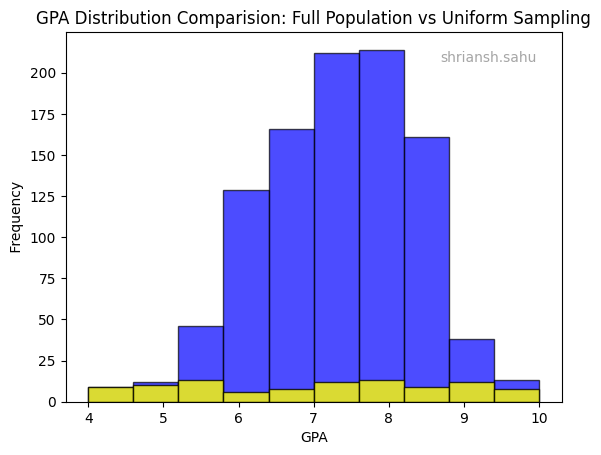

In [12]:
dataset = StudentDataset(1000,"shriansh.sahu")
uniform_sample = dataset.sample_gpa_uniform()
dataset.plot_gpa_histogram_comparison(sampled_df=uniform_sample)

# 1.5 Program-Major Balanced Cohort

### Showing HeatMap and Counts

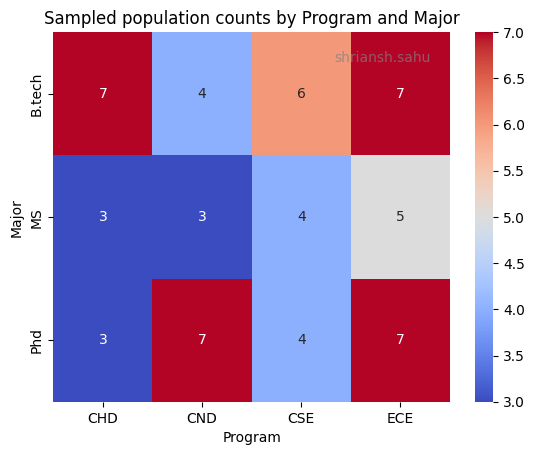

     Major Program  Count
0   B.tech     CHD      7
1   B.tech     CND      4
2   B.tech     CSE      6
3   B.tech     ECE      7
4       MS     CHD      3
5       MS     CND      3
6       MS     CSE      4
7       MS     ECE      5
8      Phd     CHD      3
9      Phd     CND      7
10     Phd     CSE      4
11     Phd     ECE      7


In [15]:
dataset = StudentDataset(10000,"shriansh.sahu")
uniform_sample = dataset.sample_program_major_balanced()
dataset.show_program_major_counts_and_heatmap(uniform_sample)